In [186]:
from utils import *

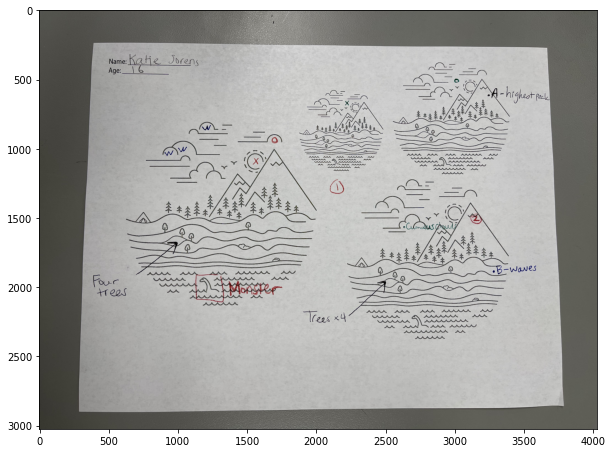

In [274]:
img = cv2.imread('sample1.jpeg')
plott(img)

In [275]:
img_cpy = img.copy()
img_cpy[(img_cpy[..., :2].max(axis=2)-img_cpy[..., :2].min(axis=2)<10)] = (0, 0, 255)

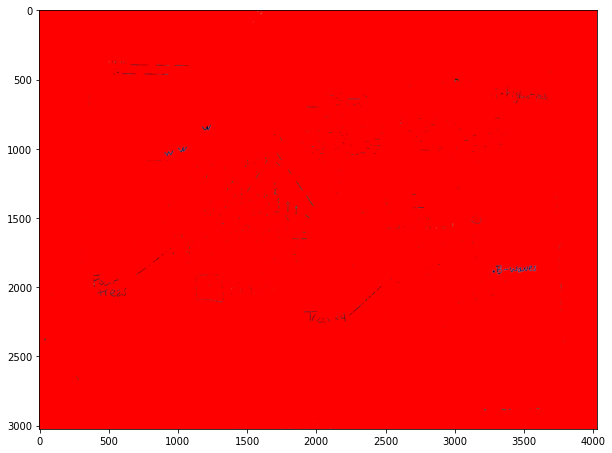

In [276]:
plott(img_cpy)

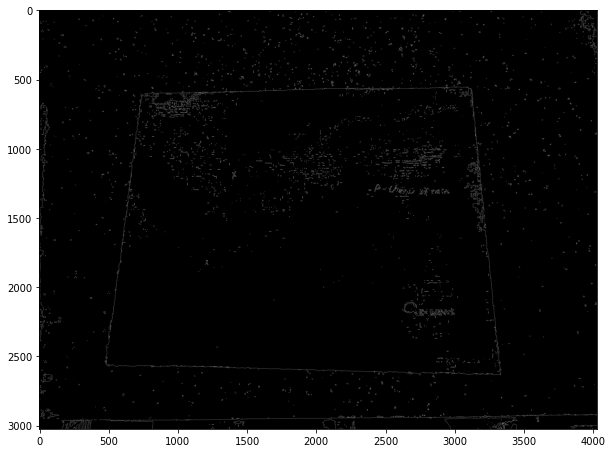

In [265]:
edged = cv2.Canny(img_cpy, 100, 200, apertureSize=3)
plott(edged)

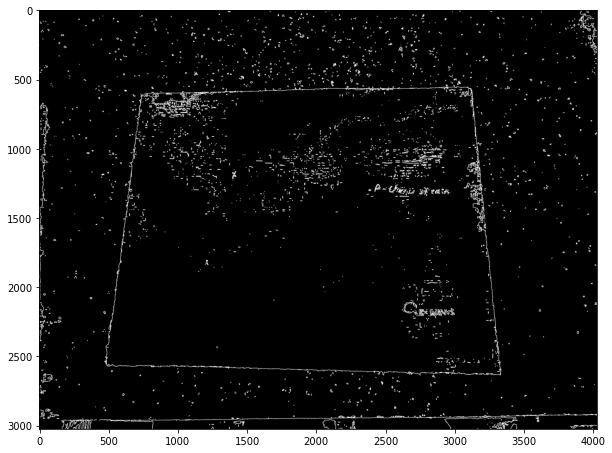

In [266]:
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(edged, kernel, iterations=1)
plott(dilated)

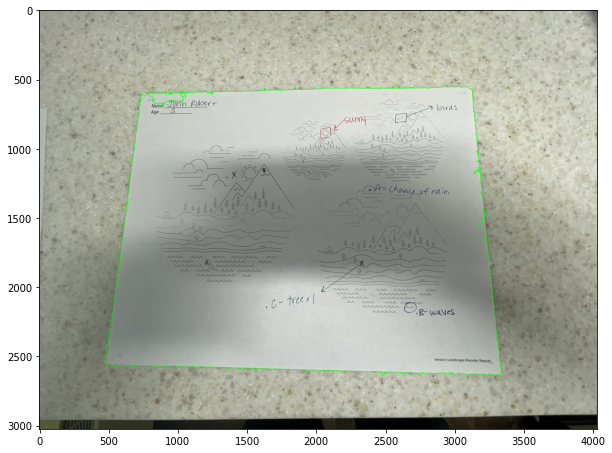

In [267]:
cnts, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_cntr = max(cnts, key=lambda x: cv2.contourArea(x))
wth_max_cntr = cv2.drawContours(img.copy(), [max_cntr], 0, (0, 255, 0), 2)
plott(wth_max_cntr)

In [272]:
peri = cv2.arcLength(max_cntr, True)
pts1 = cv2.approxPolyDP(max_cntr, 0.032*peri, True)
pts1 = np.float32(pts1)
h, w = img.shape[:2]
pts2 = np.float32([[w, 0], [0, 0], [0, h], [w, h]])

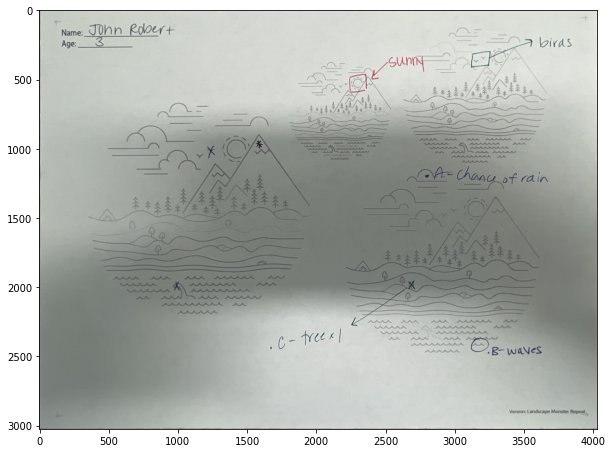

In [273]:
M = cv2.getPerspectiveTransform(pts1, pts2)
output = cv2.warpPerspective(img, M, (w, h))
plott(output)